In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

def binary_segnet_model(input_shape):
    # Encoder
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Decoder
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())

    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())

    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())

    # Output layer
    model.add(layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same'))

    return model

#input_shape = train_images.shape[1:]

# Create the binary SegNet model
binary_segnet = binary_segnet_model((216, 384, 3))

# Display model summary
binary_segnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 216, 384, 64)      1792      
                                                                 
 batch_normalization_6 (Bat  (None, 216, 384, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 108, 192, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 192, 128)     73856     
                                                                 
 batch_normalization_7 (Bat  (None, 108, 192, 128)     512       
 chNormalization)                                                
                                                      

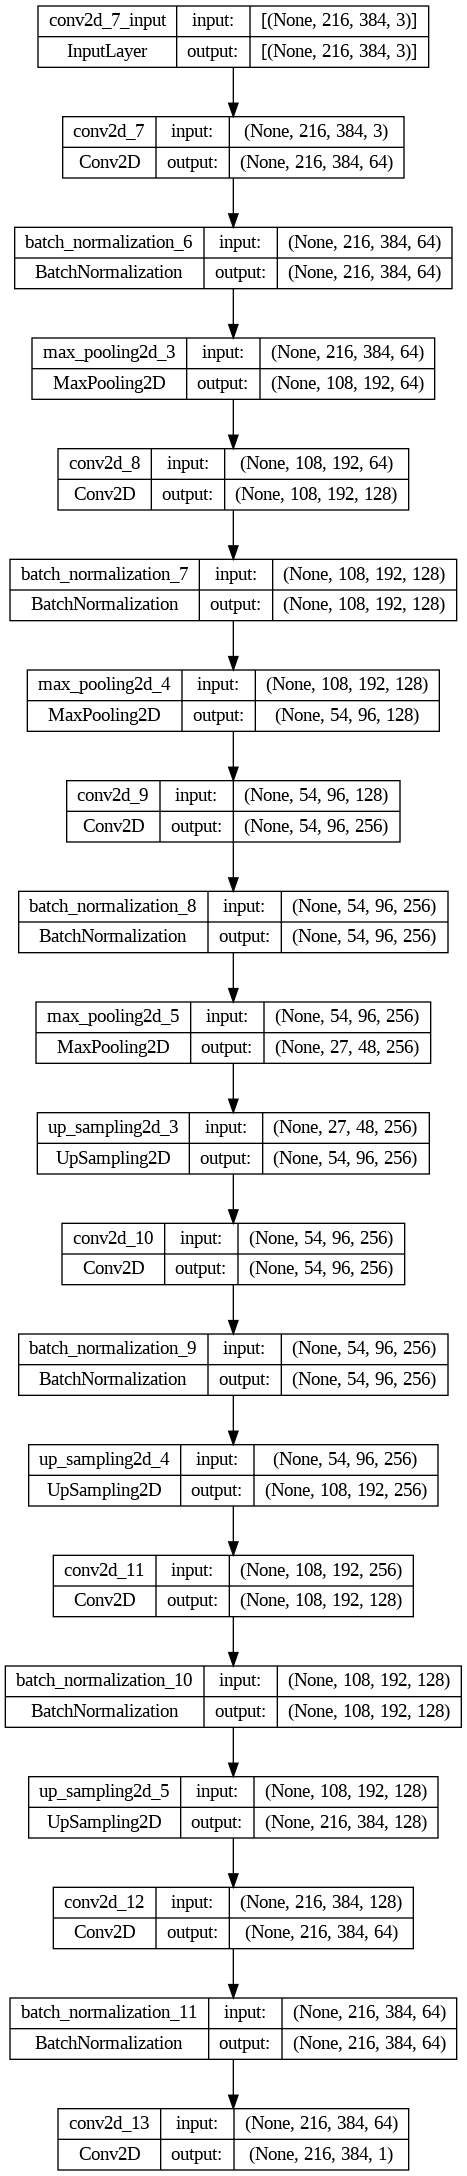

In [5]:
from tensorflow.keras.utils import plot_model

# Save the plot to a file
plot_model(binary_segnet, to_file='binary_segnet_model.png', show_shapes=True, show_layer_names=True)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 10.7 MB/s eta 0:00:00


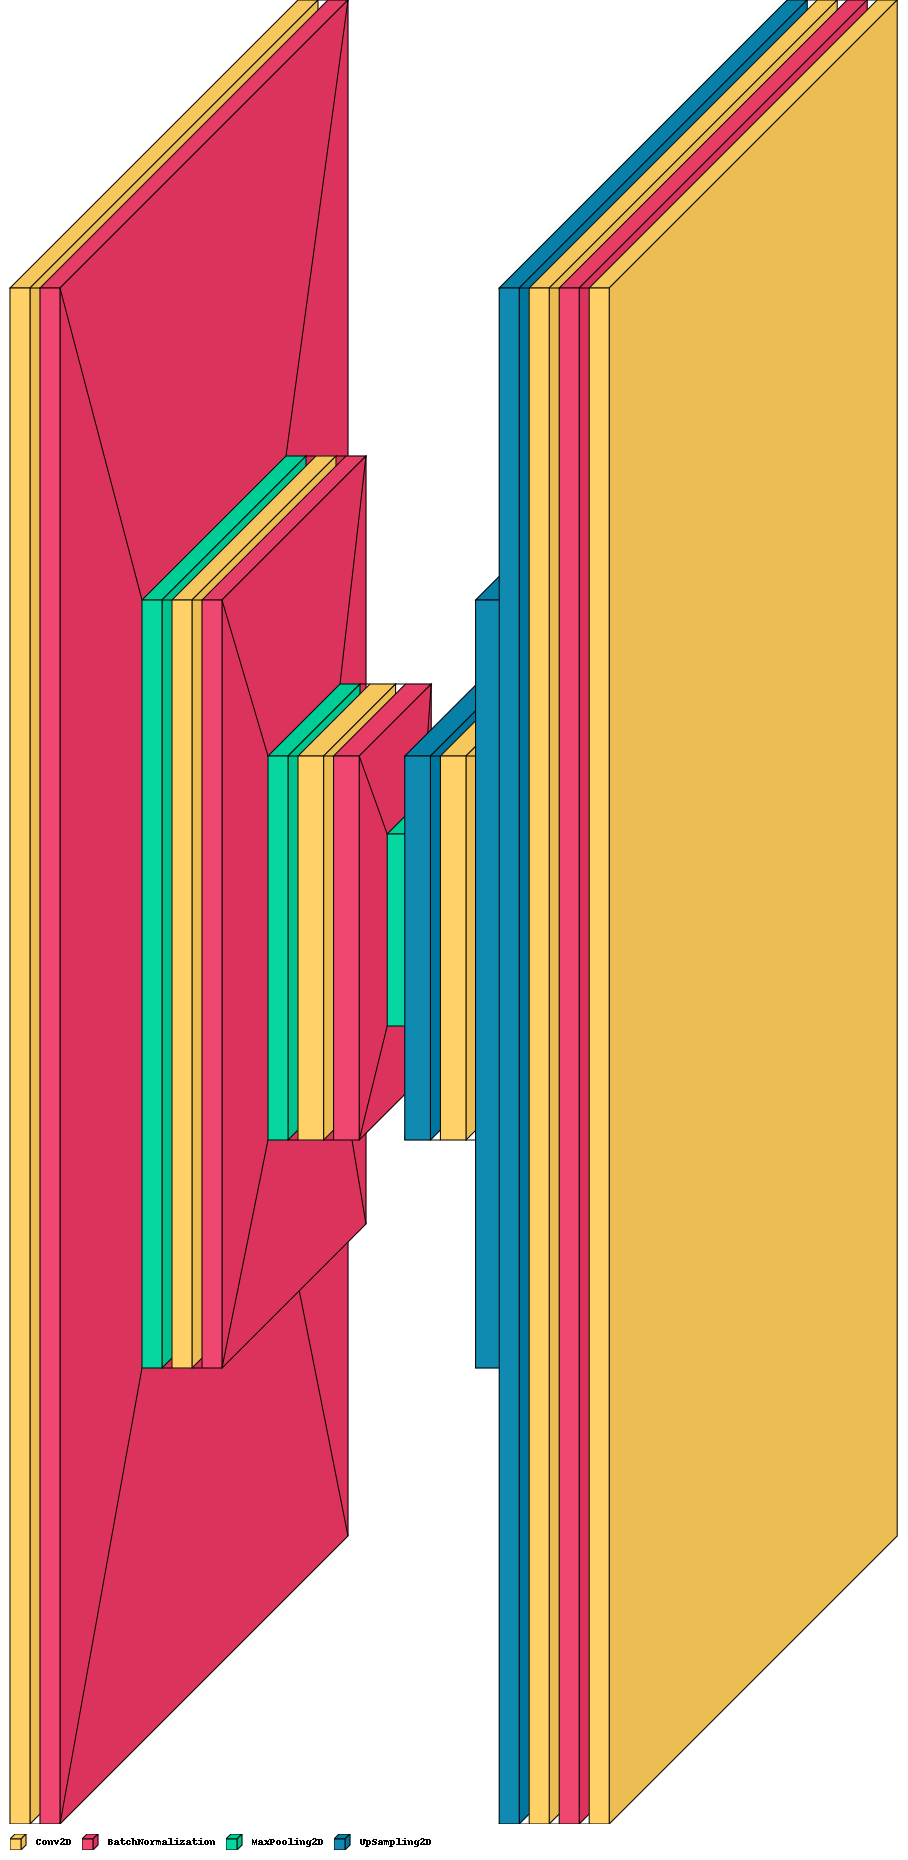

In [6]:
!pip3 install visualkeras
import visualkeras

visualkeras.layered_view(binary_segnet, legend=True)

In [7]:
binary_segnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Model Compiled")

Model Compiled


In [8]:
binary_segnet.save('/content/drive/My Drive/Segnet IDD Project/Version 5/binary_segnet_model.h5')